0: Burpees
1: Medicine Ball
2: armraise
3: boso
4: bosopushup
5: boxing
6: chair
7: curl
8: cycling
9: dips
10: flix
11: freestyle
12: hammerthrows
13: highraise
14: kicking
15: onelegdown
16: plank
17: punchball
18: pushups
19: ridgeplunges
20: running
21: scooter
22: sideside
23: sidestretch
24: singlelegright
25: split
26: squat
27: step
28: throws
29: vshiftswift
30: weights

In [42]:
#importing all required packages

import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc, roc_curve
from sklearn.preprocessing import RobustScaler
import time
import pickle
import os

import warnings
warnings.filterwarnings('ignore')

In [70]:
#reading csv file for the filtered data
columns = ["SubjectID","Timestamp(microseconds)","AccelX(g)_leg","AccelY(g)_leg","AccelZ(g)_leg","GyroX(¬∞/s)_leg","GyroY(¬∞/s)_leg","GyroZ(¬∞/s)_leg","AccelX(g)_hand","AccelY(g)_hand","AccelZ(g)_hand","GyroX(¬∞/s)_hand","GyroY(¬∞/s)_hand","GyroZ(¬∞/s)_hand","AccelX(g)_chest","AccelY(g)_chest","AccelZ(g)_chest","Sample(V)","Activity_Label"]
df = pd.read_csv("PDdata_31activities.csv", header=0, names = columns, dtype={'SubjectID': str})

In [71]:
df

SubjectID  Timestamp(microseconds)  AccelX(g)_leg  AccelY(g)_leg  \
0              1         1613575026007263      -0.621653       0.469306   
1              1         1613575026023239      -0.621653       0.435859   
2              1         1613575026039215      -0.622751       0.419989   
3              1         1613575026055191      -0.625437       0.418280   
4              1         1613575026071167      -0.621164       0.406073   
...          ...                      ...            ...            ...   
367976         8         1614295140928869      -1.160723      -0.046326   
367977         8         1614295140944846      -1.077592      -0.114809   
367978         8         1614295140960823      -1.013016      -0.075624   
367979         8         1614295140976800      -0.677317       0.022278   
367980         8         1614295140992776      -0.248234       0.029603   

        AccelZ(g)_leg  GyroX(¬∞/s)_leg  GyroY(¬∞/s)_leg  GyroZ(¬∞/s)_leg  \
0           -0.509712       -24.017700        13.641566       -24.750134   
1           -0.520333       -26.276036        15.899901       -25.665675   
2           -0.560128       -25.848783        16.021973       -24.444953   
3           -0.545846       -22.064546        14.923323       -18.829633   
4           -0.505074        -9.430076        11.810483        -9.430076   
...               ...              ...              ...              ...   
367976       0.274479        33.417258       -35.919738       -34.149691   
367977       0.132265        28.168154       -10.772869       -33.173114   
367978      -0.015930        -3.082322         4.425116       -37.506676   
367979      -0.229068       -41.412985        25.909819       -35.553521   
367980      -0.372259       -85.786221        83.527886       -37.567712   

        AccelX(g)_hand  AccelY(g)_hand  AccelZ(g)_hand  GyroX(¬∞/s)_hand  \
0            -0.914015       -0.436103        0.203189         -7.232776   
1            -0.884230       -0.441596        0.183658         -7.598993   
2            -0.884352       -0.448432        0.208316         -4.730297   
3            -0.893629       -0.447456        0.200626         -3.509575   
4            -0.881422       -0.404730        0.189029         -0.457771   
...                ...             ...             ...               ...   
367976        0.470649        0.293400       -0.783276         53.925383   
367977        0.466133        0.296574       -0.814771         54.047456   
367978        0.465278        0.314397       -0.822217         53.864347   
367979        0.456123        0.335149       -0.818677         46.540017   
367980        0.458076        0.318181       -0.816114         36.224918   

        GyroY(¬∞/s)_hand  GyroZ(¬∞/s)_hand  AccelX(g)_chest  AccelY(g)_chest  \
0               8.575570         -4.608225        -0.027771         0.902419   
1               8.453498         -4.730297        -0.027771         0.902419   
2               9.185931         -5.401694        -0.027771         0.902419   
3               9.308003         -6.012055        -0.011170         0.953689   
4               9.674220         -6.256199        -0.011170         0.953689   
...                  ...               ...              ...              ...   
367976          3.082322        -27.862974        -0.303166         0.894118   
367977          0.030518        -24.628061        -0.310491         0.842359   
367978         -3.326467        -19.562066        -0.310491         0.842359   
367979         -7.354849        -14.190890        -0.289982         0.826734   
367980        -12.420844         -7.965209        -0.289982         0.826734   

        AccelZ(g)_chest  Sample(V) Activity_Label  
0             -0.315862  -0.006521  Medicine Ball  
1             -0.315862  -0.006521  Medicine Ball  
2             -0.315862  -0.006521  Medicine Ball  
3             -0.340276  -0.007868  Medicine Ball  
4             -0.340276  -0.007868  Medicine Ball  
...    

In [72]:
len(df['Activity_Label'].unique())

31

In [73]:
df['Activity_Label'].unique()

array(['Medicine Ball', 'Burpees', 'step', 'scooter', 'boxing', 'cycling',
       'pushups', 'punchball', 'highraise', 'hammerthrows', 'weights',
       'throws', 'ridgeplunges', 'sidestretch', 'split', 'plank', 'dips',
       'singlelegright', 'vshiftswift', 'running', 'freestyle', 'curl',
       'armraise', 'flix', 'bosopushup', 'sideside', 'boso', 'onelegdown',
       'chair', 'squat', 'kicking'], dtype=object)

In [74]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
df['Activity_Label'] = LE.fit_transform(df['Activity_Label'])

In [75]:
for i, label in enumerate(LE.classes_):
    print(f"{i}: {label}")

0: Burpees
1: Medicine Ball
2: armraise
3: boso
4: bosopushup
5: boxing
6: chair
7: curl
8: cycling
9: dips
10: flix
11: freestyle
12: hammerthrows
13: highraise
14: kicking
15: onelegdown
16: plank
17: punchball
18: pushups
19: ridgeplunges
20: running
21: scooter
22: sideside
23: sidestretch
24: singlelegright
25: split
26: squat
27: step
28: throws
29: vshiftswift
30: weights


In [76]:
df

SubjectID  Timestamp(microseconds)  AccelX(g)_leg  AccelY(g)_leg  \
0              1         1613575026007263      -0.621653       0.469306   
1              1         1613575026023239      -0.621653       0.435859   
2              1         1613575026039215      -0.622751       0.419989   
3              1         1613575026055191      -0.625437       0.418280   
4              1         1613575026071167      -0.621164       0.406073   
...          ...                      ...            ...            ...   
367976         8         1614295140928869      -1.160723      -0.046326   
367977         8         1614295140944846      -1.077592      -0.114809   
367978         8         1614295140960823      -1.013016      -0.075624   
367979         8         1614295140976800      -0.677317       0.022278   
367980         8         1614295140992776      -0.248234       0.029603   

        AccelZ(g)_leg  GyroX(¬∞/s)_leg  GyroY(¬∞/s)_leg  GyroZ(¬∞/s)_leg  \
0           -0.509712       -24.017700        13.641566       -24.750134   
1           -0.520333       -26.276036        15.899901       -25.665675   
2           -0.560128       -25.848783        16.021973       -24.444953   
3           -0.545846       -22.064546        14.923323       -18.829633   
4           -0.505074        -9.430076        11.810483        -9.430076   
...               ...              ...              ...              ...   
367976       0.274479        33.417258       -35.919738       -34.149691   
367977       0.132265        28.168154       -10.772869       -33.173114   
367978      -0.015930        -3.082322         4.425116       -37.506676   
367979      -0.229068       -41.412985        25.909819       -35.553521   
367980      -0.372259       -85.786221        83.527886       -37.567712   

        AccelX(g)_hand  AccelY(g)_hand  AccelZ(g)_hand  GyroX(¬∞/s)_hand  \
0            -0.914015       -0.436103        0.203189         -7.232776   
1            -0.884230       -0.441596        0.183658         -7.598993   
2            -0.884352       -0.448432        0.208316         -4.730297   
3            -0.893629       -0.447456        0.200626         -3.509575   
4            -0.881422       -0.404730        0.189029         -0.457771   
...                ...             ...             ...               ...   
367976        0.470649        0.293400       -0.783276         53.925383   
367977        0.466133        0.296574       -0.814771         54.047456   
367978        0.465278        0.314397       -0.822217         53.864347   
367979        0.456123        0.335149       -0.818677         46.540017   
367980        0.458076        0.318181       -0.816114         36.224918   

        GyroY(¬∞/s)_hand  GyroZ(¬∞/s)_hand  AccelX(g)_chest  AccelY(g)_chest  \
0               8.575570         -4.608225        -0.027771         0.902419   
1               8.453498         -4.730297        -0.027771         0.902419   
2               9.185931         -5.401694        -0.027771         0.902419   
3               9.308003         -6.012055        -0.011170         0.953689   
4               9.674220         -6.256199        -0.011170         0.953689   
...                  ...               ...              ...              ...   
367976          3.082322        -27.862974        -0.303166         0.894118   
367977          0.030518        -24.628061        -0.310491         0.842359   
367978         -3.326467        -19.562066        -0.310491         0.842359   
367979         -7.354849        -14.190890        -0.289982         0.826734   
367980        -12.420844         -7.965209        -0.289982         0.826734   

        AccelZ(g)_chest  Sample(V)  Activity_Label  
0             -0.315862  -0.006521               1  
1             -0.315862  -0.006521               1  
2             -0.315862  -0.006521               1  
3             -0.340276  -0.007868               1  
4             -0.340276  -0.007868               1  
.

In [77]:
print(df.columns)


Index(['SubjectID', 'Timestamp(microseconds)', 'AccelX(g)_leg',
       'AccelY(g)_leg', 'AccelZ(g)_leg', 'GyroX(¬∞/s)_leg', 'GyroY(¬∞/s)_leg',
       'GyroZ(¬∞/s)_leg', 'AccelX(g)_hand', 'AccelY(g)_hand', 'AccelZ(g)_hand',
       'GyroX(¬∞/s)_hand', 'GyroY(¬∞/s)_hand', 'GyroZ(¬∞/s)_hand',
       'AccelX(g)_chest', 'AccelY(g)_chest', 'AccelZ(g)_chest', 'Sample(V)',
       'Activity_Label'],
      dtype='object')


In [78]:
DeleteCols = ['SubjectID','Timestamp(microseconds)']
df = df.drop(DeleteCols,axis=1)
df.head()

AccelX(g)_leg  AccelY(g)_leg  AccelZ(g)_leg  GyroX(¬∞/s)_leg  \
0      -0.621653       0.469306      -0.509712       -24.017700   
1      -0.621653       0.435859      -0.520333       -26.276036   
2      -0.622751       0.419989      -0.560128       -25.848783   
3      -0.625437       0.418280      -0.545846       -22.064546   
4      -0.621164       0.406073      -0.505074        -9.430076   

   GyroY(¬∞/s)_leg  GyroZ(¬∞/s)_leg  AccelX(g)_hand  AccelY(g)_hand  \
0        13.641566       -24.750134       -0.914015       -0.436103   
1        15.899901       -25.665675       -0.884230       -0.441596   
2        16.021973       -24.444953       -0.884352       -0.448432   
3        14.923323       -18.829633       -0.893629       -0.447456   
4        11.810483        -9.430076       -0.881422       -0.404730   

   AccelZ(g)_hand  GyroX(¬∞/s)_hand  GyroY(¬∞/s)_hand  GyroZ(¬∞/s)_hand  \
0        0.203189         -7.232776          8.575570         -4.608225   
1        0.183658         -7.598993          8.453498         -4.730297   
2        0.208316         -4.730297          9.185931         -5.401694   
3        0.200626         -3.509575          9.308003         -6.012055   
4        0.189029         -0.457771          9.674220         -6.256199   

   AccelX(g)_chest  AccelY(g)_chest  AccelZ(g)_chest  Sample(V)  \
0        -0.027771         0.902419        -0.315862  -0.006521   
1        -0.027771         0.902419        -0.315862  -0.006521   
2        -0.027771         0.902419        -0.315862  -0.006521   
3        -0.011170         0.953689        -0.340276  -0.007868   
4        -0.011170         0.953689        -0.340276  -0.007868   

   Activity_Label  
0               1  
1               1  
2               1  
3               1  
4               1

In [121]:
count = sum(df['Activity_Label'] == 1)
count

9759

In [79]:
import pickle

# Load the pickled object
with open('xgb.pkl', 'rb') as file:
    XGB = pickle.load(file)

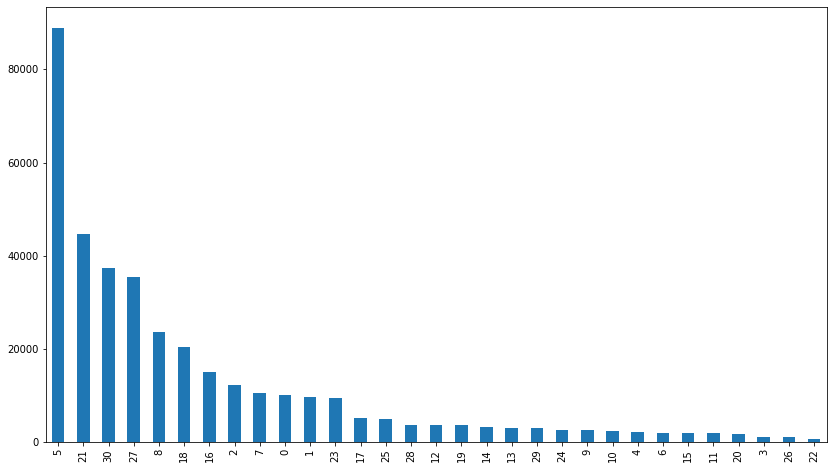

In [80]:
ax = df['Activity_Label'].value_counts().plot(kind='bar',figsize=(14,8))

In [54]:
df

Subject ID  Timestamp (microseconds)  Accel X (g)_leg  \
0                1          1613575026007263        -0.621653   
1                1          1613575026023239        -0.621653   
2                1          1613575026039215        -0.622751   
3                1          1613575026055191        -0.625437   
4                1          1613575026071167        -0.621164   
...            ...                       ...              ...   
367976           8          1614295140928869        -1.160723   
367977           8          1614295140944846        -1.077592   
367978           8          1614295140960823        -1.013016   
367979           8          1614295140976800        -0.677317   
367980           8          1614295140992776        -0.248234   

        Accel Y (g)_leg  Accel Z (g)_leg  Gyro X (°/s)_leg  Gyro Y (°/s)_leg  \
0              0.469306        -0.509712        -24.017700         13.641566   
1              0.435859        -0.520333        -26.276036         15.899901   
2              0.419989        -0.560128        -25.848783         16.021973   
3              0.418280        -0.545846        -22.064546         14.923323   
4              0.406073        -0.505074         -9.430076         11.810483   
...                 ...              ...               ...               ...   
367976        -0.046326         0.274479         33.417258        -35.919738   
367977        -0.114809         0.132265         28.168154        -10.772869   
367978        -0.075624        -0.015930         -3.082322          4.425116   
367979         0.022278        -0.229068        -41.412985         25.909819   
367980         0.029603        -0.372259        -85.786221         83.527886   

        Gyro Z (°/s)_leg  Accel X (g)_hand  Accel Y (g)_hand  \
0             -24.750134         -0.914015         -0.436103   
1             -25.665675         -0.884230         -0.441596   
2             -24.444953         -0.884352         -0.448432   
3             -18.829633         -0.893629         -0.447456   
4              -9.430076         -0.881422         -0.404730   
...                  ...               ...               ...   
367976        -34.149691          0.470649          0.293400   
367977        -33.173114          0.466133          0.296574   
367978        -37.506676          0.465278          0.314397   
367979        -35.553521          0.456123          0.335149   
367980        -37.567712          0.458076          0.318181   

        Accel Z (g)_hand  Gyro X (°/s)_hand  Gyro Y (°/s)_hand  \
0               0.203189          -7.232776           8.575570   
1               0.183658          -7.598993           8.453498   
2               0.208316          -4.730297           9.185931   
3               0.200626          -3.509575           9.308003   
4               0.189029          -0.457771           9.674220   
...                  ...                ...                ...   
367976         -0.783276          53.925383           3.082322   
367977         -0.814771          54.047456           0.030518   
367978         -0.822217          53.864347          -3.326467   
367979         -0.818677          46.540017          -7.354849   
367980         -0.816114          36.224918         -12.420844   

        Gyro Z (°/s)_hand  Accel X (g)_chest  Accel Y (g)_chest  \
0               -4.608225          -0.027771           0.902419   
1               -4.730297          -0.027771           0.902419   
2               -5.401694          -0.027771           0.902419   
3               -6.012055          -0.011170           0.953689   
4               -6.256199          -0.011170           0.953689   
...                   ...                ...                ...   
367976         -27.862974          -0.303166           0.894118   
367977         -24.628061          -0.310491           0.842359   
367978         -19.562066          -0.310491           0.842359   
367979         -14.190890         

In [94]:
PredictorCol=['AccelX(g)_leg', 'AccelY(g)_leg', 'AccelZ(g)_leg', 'GyroX(¬∞/s)_leg',
       'GyroY(¬∞/s)_leg', 'GyroZ(¬∞/s)_leg', 'AccelX(g)_hand',
       'AccelY(g)_hand', 'AccelZ(g)_hand', 'GyroX(¬∞/s)_hand',
       'GyroY(¬∞/s)_hand', 'GyroZ(¬∞/s)_hand', 'AccelX(g)_chest',
       'AccelY(g)_chest', 'AccelZ(g)_chest', 'Sample(V)']
TargetCol= 'Activity_Label'

X = df[PredictorCol].values
y = df[TargetCol].values

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 1.0, random_state=12)

In [95]:
prediction=XGB.predict(X)
from sklearn import metrics
print(metrics.classification_report(y, prediction))
print(metrics.confusion_matrix(y, prediction))

              precision    recall  f1-score   support

           0       0.09      0.00      0.00     10070
           1       0.00      0.00      0.00      9759
           2       0.07      0.01      0.01     12257
           3       0.00      0.00      0.00      1189
           4       0.00      0.00      0.00      2253
           5       0.22      0.05      0.08     88895
           6       0.01      0.04      0.02      2003
           7       0.01      0.01      0.01     10439
           8       0.50      0.00      0.00     23712
           9       0.00      0.00      0.00      2500
          10       0.00      0.00      0.00      2438
          11       0.00      0.06      0.01      1875
          12       0.00      0.00      0.00      3631
          13       0.03      0.01      0.02      3067
          14       0.01      0.54      0.02      3255
          15       0.00      0.00      0.00      1877
          16       0.03      0.03      0.03     14940
          17       0.00    

In [98]:
for i in range(len(y)):
    print("Actual Label: ", y[i], " Predicted Label: ", prediction[i])

Actual Label:  1  Predicted Label:  14
Actual Label:  1  Predicted Label:  14
Actual Label:  1  Predicted Label:  25
Actual Label:  1  Predicted Label:  25
Actual Label:  1  Predicted Label:  25
Actual Label:  1  Predicted Label:  25
Actual Label:  1  Predicted Label:  14
Actual Label:  1  Predicted Label:  14
Actual Label:  1  Predicted Label:  14
Actual Label:  1  Predicted Label:  25
Actual Label:  1  Predicted Label:  25
Actual Label:  1  Predicted Label:  25
Actual Label:  1  Predicted Label:  25
Actual Label:  1  Predicted Label:  25
Actual Label:  1  Predicted Label:  14
Actual Label:  1  Predicted Label:  14
Actual Label:  1  Predicted Label:  14
Actual Label:  1  Predicted Label:  14
Actual Label:  1  Predicted Label:  14
Actual Label:  1  Predicted Label:  14
Actual Label:  1  Predicted Label:  14
Actual Label:  1  Predicted Label:  25
Actual Label:  1  Predicted Label:  25
Actual Label:  1  Predicted Label:  14
Actual Label:  1  Predicted Label:  14
Actual Label:  1  Predict

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [99]:
from collections import defaultdict
label_counts = defaultdict(int)

for i in range(len(y)):
    actual_label = y[i]
    predicted_label = prediction[i]
    label_counts[f"actual_{actual_label}_predicted_{predicted_label}"] += 1
    print("Actual Label: ", actual_label, " Predicted Label: ", predicted_label)

print("\nLabel Counts:")
for label, count in label_counts.items():
    print(f"{label}: {count}")

Actual Label:  1  Predicted Label:  14
Actual Label:  1  Predicted Label:  14
Actual Label:  1  Predicted Label:  25
Actual Label:  1  Predicted Label:  25
Actual Label:  1  Predicted Label:  25
Actual Label:  1  Predicted Label:  25
Actual Label:  1  Predicted Label:  14
Actual Label:  1  Predicted Label:  14
Actual Label:  1  Predicted Label:  14
Actual Label:  1  Predicted Label:  25
Actual Label:  1  Predicted Label:  25
Actual Label:  1  Predicted Label:  25
Actual Label:  1  Predicted Label:  25
Actual Label:  1  Predicted Label:  25
Actual Label:  1  Predicted Label:  14
Actual Label:  1  Predicted Label:  14
Actual Label:  1  Predicted Label:  14
Actual Label:  1  Predicted Label:  14
Actual Label:  1  Predicted Label:  14
Actual Label:  1  Predicted Label:  14
Actual Label:  1  Predicted Label:  14
Actual Label:  1  Predicted Label:  25
Actual Label:  1  Predicted Label:  25
Actual Label:  1  Predicted Label:  14
Actual Label:  1  Predicted Label:  14
Actual Label:  1  Predict

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 Predicted Label:  14
Actual Label:  5  Predicted Label:  14
Actual Label:  5  Predicted Label:  14
Actual Label:  5  Predicted Label:  14
Actual Label:  5  Predicted Label:  14
Actual Label:  5  Predicted Label:  14
Actual Label:  5  Predicted Label:  14
Actual Label:  5  Predicted Label:  14
Actual Label:  5  Predicted Label:  14
Actual Label:  5  Predicted Label:  14
Actual Label:  5  Predicted Label:  14
Actual Label:  5  Predicted Label:  14
Actual Label:  5  Predicted Label:  32
Actual Label:  5  Predicted Label:  14
Actual Label:  5  Predicted Label:  32
Actual Label:  5  Predicted Label:  14
Actual Label:  5  Predicted Label:  14
Actual Label:  5  Predicted Label:  14
Actual Label:  5  Predicted Label:  14
Actual Label:  5  Predicted Label:  14
Actual Label:  5  Predicted Label:  11
Actual Label:  5  Predicted Label:  11
Actual Label:  5  Predicted Label:  14
Actual Label:  5  Predicted Label:  6
Actual Label:  5  Predicted Label:  5
Actual Label:  5  Predicted Label:  11
Actua

In [111]:
from collections import defaultdict
label_counts = defaultdict(int)
total_counts = defaultdict(int)

for i in range(len(y)):
    actual_label = y[i]
    predicted_label = prediction[i]
    label_counts[f"actual_{actual_label}predicted{predicted_label}"] += 1
    total_counts[f"actual_{actual_label}"] += 1
    #print("Actual Label: ", actual_label, " Predicted Label: ", predicted_label)

print("\nLabel Counts:")
for label, count in label_counts.items():
    print(f"{label}: {count}")

print("\nRatios:")
for label, count in label_counts.items():
    actual_label = label.split("_")[1]
    print(f"{label} ratio: {count / total_counts[f'actual{actual_label}']}")


Label Counts:
actual_1predicted14: 4531
actual_1predicted25: 170
actual_1predicted32: 1278
actual_1predicted16: 130
actual_1predicted5: 421
actual_1predicted7: 827
actual_1predicted27: 260
actual_1predicted11: 1245
actual_1predicted6: 69
actual_1predicted13: 289
actual_1predicted24: 294
actual_1predicted12: 97
actual_1predicted20: 106
actual_1predicted4: 29
actual_1predicted18: 2
actual_1predicted29: 2
actual_1predicted30: 2
actual_1predicted0: 3
actual_0predicted14: 4103
actual_0predicted32: 1114
actual_0predicted11: 1769
actual_0predicted5: 432
actual_0predicted27: 303
actual_0predicted25: 154
actual_0predicted4: 75
actual_0predicted12: 297
actual_0predicted7: 789
actual_0predicted16: 205
actual_0predicted24: 337
actual_0predicted6: 113
actual_0predicted13: 272
actual_0predicted20: 83
actual_27predicted16: 1257
actual_27predicted14: 18508
actual_27predicted11: 4333
actual_27predicted32: 4280
actual_27predicted27: 992
actual_27predicted5: 1538
actual_27predicted24: 1884
actual_27pred

ZeroDivisionError: division by zero

In [112]:
from collections import defaultdict
label_counts = defaultdict(int)
total_counts = defaultdict(int)

for i in range(len(y)):
    actual_label = y[i]
    predicted_label = prediction[i]
    label_counts[f"actual_{actual_label}_predicted_{predicted_label}"] += 1
    total_counts[f'actual{actual_label}'] += 1

print("\nLabel Counts:")
for label, count in label_counts.items():
    print(f"{label}: {count}")

print("\nRatios:")
for label, count in label_counts.items():
    actual_label = label.split("_")[1]
    if f'actual{actual_label}' in total_counts:
        print(f"{label} ratio: {count / total_counts[f'actual{actual_label}']}")
    else:
        print(f"Ratio for {label} cannot be calculated because the actual label count is 0.")



Label Counts:
actual_1_predicted_14: 4531
actual_1_predicted_25: 170
actual_1_predicted_32: 1278
actual_1_predicted_16: 130
actual_1_predicted_5: 421
actual_1_predicted_7: 827
actual_1_predicted_27: 260
actual_1_predicted_11: 1245
actual_1_predicted_6: 69
actual_1_predicted_13: 289
actual_1_predicted_24: 294
actual_1_predicted_12: 97
actual_1_predicted_20: 106
actual_1_predicted_4: 29
actual_1_predicted_18: 2
actual_1_predicted_29: 2
actual_1_predicted_30: 2
actual_1_predicted_0: 3
actual_0_predicted_14: 4103
actual_0_predicted_32: 1114
actual_0_predicted_11: 1769
actual_0_predicted_5: 432
actual_0_predicted_27: 303
actual_0_predicted_25: 154
actual_0_predicted_4: 75
actual_0_predicted_12: 297
actual_0_predicted_7: 789
actual_0_predicted_16: 205
actual_0_predicted_24: 337
actual_0_predicted_6: 113
actual_0_predicted_13: 272
actual_0_predicted_20: 83
actual_27_predicted_16: 1257
actual_27_predicted_14: 18508
actual_27_predicted_11: 4333
actual_27_predicted_32: 4280
actual_27_predicted_

In [122]:
import pandas as pd

data = {'Label': [], 'Ratio': []}
for label, count in label_counts.items():
    actual_label = label.split("_")[1]
    if f'actual{actual_label}' in total_counts:
        data['Label'].append(label)
        data['Ratio'].append(count / total_counts[f'actual{actual_label}'])
    else:
        data['Label'].append(label)
        data['Ratio'].append("N/A")
        
df2 = pd.DataFrame(data)
print(df2)

                      Label     Ratio
0     actual_1_predicted_14  0.464289
1     actual_1_predicted_25  0.017420
2     actual_1_predicted_32  0.130956
3     actual_1_predicted_16  0.013321
4      actual_1_predicted_5  0.043140
..                      ...       ...
487  actual_14_predicted_32  0.176651
488  actual_14_predicted_25  0.034716
489   actual_14_predicted_5  0.028571
490  actual_14_predicted_20  0.014747
491   actual_14_predicted_2  0.000307

[492 rows x 2 columns]


In [130]:
import pandas as pd

results = []
for label, count in label_counts.items():
    actual_label = label.split("_")[1]
    if f'actual{actual_label}' in total_counts:
        ratio = count / total_counts[f'actual{actual_label}']
        total = total_counts[f'actual{actual_label}']
    else:
        ratio = None
    results.append([label, count,  total,ratio])

df2 = pd.DataFrame(results, columns=["Label", "Count","Total", "Ratio=count/total"])
print(df2)

                      Label  Count  Total  Ratio=count/total
0     actual_1_predicted_14   4531   9759           0.464289
1     actual_1_predicted_25    170   9759           0.017420
2     actual_1_predicted_32   1278   9759           0.130956
3     actual_1_predicted_16    130   9759           0.013321
4      actual_1_predicted_5    421   9759           0.043140
..                      ...    ...    ...                ...
487  actual_14_predicted_32    575   3255           0.176651
488  actual_14_predicted_25    113   3255           0.034716
489   actual_14_predicted_5     93   3255           0.028571
490  actual_14_predicted_20     48   3255           0.014747
491   actual_14_predicted_2      1   3255           0.000307

[492 rows x 4 columns]


In [132]:
pd.options.display.max_rows = None



In [133]:
df2

Label  Count  Total  Ratio=count/total
0     actual_1_predicted_14   4531   9759           0.464289
1     actual_1_predicted_25    170   9759           0.017420
2     actual_1_predicted_32   1278   9759           0.130956
3     actual_1_predicted_16    130   9759           0.013321
4      actual_1_predicted_5    421   9759           0.043140
5      actual_1_predicted_7    827   9759           0.084742
6     actual_1_predicted_27    260   9759           0.026642
7     actual_1_predicted_11   1245   9759           0.127575
8      actual_1_predicted_6     69   9759           0.007070
9     actual_1_predicted_13    289   9759           0.029614
10    actual_1_predicted_24    294   9759           0.030126
11    actual_1_predicted_12     97   9759           0.009940
12    actual_1_predicted_20    106   9759           0.010862
13     actual_1_predicted_4     29   9759           0.002972
14    actual_1_predicted_18      2   9759           0.000205
15    actual_1_predicted_29      2   9759           0.000205
16    actual_1_predicted_30      2   9759           0.000205
17     actual_1_predicted_0      3   9759           0.000307
18    actual_0_predicted_14   4103  10070           0.407448
19    actual_0_predicted_32   1114  10070           0.110626
20    actual_0_predicted_11   1769  10070           0.175670
21     actual_0_predicted_5    432  10070           0.042900
22    actual_0_predicted_27    303  10070           0.030089
23    actual_0_predicted_25    154  10070           0.015293
24     actual_0_predicted_4     75  10070           0.007448
25    actual_0_predicted_12    297  10070           0.029494
26     actual_0_predicted_7    789  10070           0.078352
27    actual_0_predicted_16    205  10070           0.020357
28    actual_0_predicted_24    337  10070           0.033466
29     actual_0_predicted_6    113  10070           0.011221
30    actual_0_predicted_13    272  10070           0.027011
31    actual_0_predicted_20     83  10070           0.008242
32   actual_27_predicted_16   1257  35496           0.035412
33   actual_27_predicted_14  18508  35496           0.521411
34   actual_27_predicted_11   4333  35496           0.122070
35   actual_27_predicted_32   4280  35496           0.120577
36   actual_27_predicted_27    992  35496           0.027947
37    actual_27_predicted_5   1538  35496           0.043329
38   actual_27_predicted_24   1884  35496           0.053076
39    actual_27_predicted_7    452  35496           0.012734
40   actual_27_predicted_25    766  35496           0.021580
41    actual_27_predicted_6    429  35496           0.012086
42   actual_27_predicted_20    682  35496           0.019213
43    actual_27_predicted_4     47  35496           0.001324
44   actual_21_predicted_14  20103  44608           0.450659
45   actual_21_predicted_32   3350  44608           0.075099
46   actual_21_predicted_11   5767  44608           0.129282
47   actual_21_predicted_25   1210  44608           0.027125
48    actual_21_predicted_7   3215  44608           0.072072
49   actual_21_predicted_27   1588  44608           0.035599
50   actual_21_predicted_24   1663  44608           0.037280
51    actual_21_predicted_5    835  44608           0.018719
52   actual_21_predicted_16   1549  44608           0.034725
53   actual_21_predicted_20   2078  44608           0.046584
54    actual_21_predicted_6    948  44608           0.021252
55    actual_21_predicted_4    140  44608           0.003138
56   actual_21_predicted_12   1226  44608           0.027484
57    actual_21_predicted_8      1  44608           0.000022
58    actual_21_predicted_0     88  44608           0.001973
59   actual_21_predicted_13     50  44608           0.001121
60    actual_21_predicted_2    200  44608           0.004484
61    actual_21_predicted_3     26  44608           0.000583
62   actual_21_predicted_19     60  44608           0.001345
63     actual_5_predicted_7    446  88895           0.005017
64    actual_5_predicted_11   6780  88895           0.076

In [135]:
df2.sort_values(by='Ratio=count/total', ascending=False, inplace=True)


In [136]:
df2.to_csv("XGB_results.csv")

In [137]:
df2

Label  Count  Total  Ratio=count/total
466  actual_26_predicted_20    783   1126           0.695382
481  actual_14_predicted_14   1757   3255           0.539785
66    actual_5_predicted_14  47494  88895           0.534271
339  actual_11_predicted_14    982   1875           0.523733
33   actual_27_predicted_14  18508  35496           0.521411
131  actual_17_predicted_14   2689   5190           0.518112
94    actual_8_predicted_14  12282  23712           0.517966
444  actual_15_predicted_14    972   1877           0.517848
227  actual_23_predicted_14   4475   9382           0.476977
351   actual_7_predicted_14   4971  10439           0.476195
0     actual_1_predicted_14   4531   9759           0.464289
368   actual_2_predicted_14   5652  12257           0.461124
44   actual_21_predicted_14  20103  44608           0.450659
246  actual_25_predicted_14   2118   4876           0.434372
192  actual_28_predicted_14   1618   3756           0.430777
108  actual_18_predicted_14   8473  20465           0.414024
18    actual_0_predicted_14   4103  10070           0.407448
315  actual_29_predicted_21   1191   2938           0.405378
418  actual_22_predicted_20    303    751           0.403462
150  actual_13_predicted_14   1158   3067           0.377568
168  actual_12_predicted_14   1367   3631           0.376480
178  actual_30_predicted_14  14034  37291           0.376337
255  actual_16_predicted_14   5592  14940           0.374297
454   actual_6_predicted_14    730   2003           0.364453
326  actual_20_predicted_14    621   1750           0.354857
213  actual_19_predicted_14   1220   3630           0.336088
392   actual_10_predicted_2    799   2438           0.327728
403   actual_4_predicted_14    726   2253           0.322237
325  actual_20_predicted_32    540   1750           0.308571
429   actual_3_predicted_14    366   1189           0.307822
304  actual_24_predicted_32    774   2562           0.302108
216  actual_19_predicted_32    977   3630           0.269146
299   actual_24_predicted_5    626   2562           0.244340
148  actual_13_predicted_11    719   3067           0.234431
408   actual_4_predicted_20    509   2253           0.225921
249  actual_25_predicted_32   1042   4876           0.213700
277    actual_9_predicted_7    516   2500           0.206400
309  actual_29_predicted_14    592   2938           0.201498
383  actual_10_predicted_16    488   2438           0.200164
439   actual_3_predicted_24    229   1189           0.192599
337  actual_11_predicted_32    357   1875           0.190400
455   actual_6_predicted_32    373   2003           0.186221
286   actual_9_predicted_12    463   2500           0.185200
405   actual_4_predicted_24    415   2253           0.184199
487  actual_14_predicted_32    575   3255           0.176651
20    actual_0_predicted_11   1769  10070           0.175670
96    actual_8_predicted_32   4160  23712           0.175439
384  actual_10_predicted_14    397   2438           0.162838
140  actual_17_predicted_32    797   5190           0.153565
327  actual_20_predicted_24    258   1750           0.147429
111  actual_18_predicted_32   2989  20465           0.146054
435   actual_3_predicted_20    168   1189           0.141295
421  actual_22_predicted_27    106    751           0.141145
443  actual_15_predicted_11    260   1877           0.138519
165  actual_12_predicted_20    502   3631           0.138254
449  actual_15_predicted_32    255   1877           0.135855
2     actual_1_predicted_32   1278   9759           0.130956
194  actual_28_predicted_24    491   3756           0.130724
201  actual_28_predicted_20    489   3756           0.130192
258  actual_16_predicted_32   1938  14940           0.129719
46   actual_21_predicted_11   5767  44608           0.129282
7     actual_1_predicted_11   1245   9759           0.127575
183  actual_30_predicted_11   4703  37291           0.126116
279   actual_9_predicted_14    309   2500           0.123600
71    actual_5_predicted_32  10866  88895           0.122